In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/dataset",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 274 images belonging to 6 classes.


In [ ]:
from tensorflow import keras
from keras import applications
from keras.applications import inception_v3 

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
incep = InceptionV3(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in incep.layers:
  layer.trainable = False

In [ ]:


from tensorflow.keras import layers

x = layers.Flatten()(incep.output)

In [ ]:
prediction = layers.Dense(units = 6, activation="softmax")(x)

model = tf.keras.models.Model(inputs = incep.input, outputs=prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 24, steps_per_epoch=len(train_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/24
9/9 [==============================] - 168s 16s/step - loss: 5.9922 - accuracy: 0.3613
Epoch 2/24
9/9 [==============================] - 7s 779ms/step - loss: 1.9738 - accuracy: 0.6715
Epoch 3/24
9/9 [==============================] - 7s 811ms/step - loss: 1.5366 - accuracy: 0.7482
Epoch 4/24
9/9 [==============================] - 7s 773ms/step - loss: 1.1990 - accuracy: 0.8212
Epoch 5/24
9/9 [==============================] - 7s 786ms/step - loss: 0.9735 - accuracy: 0.8321
Epoch 6/24
9/9 [==============================] - 7s 767ms/step - loss: 0.7231 - accuracy: 0.8613
Epoch 7/24
9/9 [==============================] - 7s 765ms/step - loss: 0.6866 - accuracy: 0.8650
Epoch 8/24
9/9 [==============================] - 7s 763ms/step - loss: 0.2498 - accuracy: 0.9453
Epoch 9/24
9/9 [==============================] - 7s 815ms/step - loss: 0.2581 - accuracy: 0.9270
Epoch 10/24
9/9 [==============================] - 7s 773ms/step - loss: 0.2439 - accuracy: 0.9416
Epoch 11/24
9/9 [==

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["Bacterial leaf blight", "Brown spot","False Smut", "healthy plant", "Leaf smut","Stem rot"]
def rice_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("disease: ", predicted_value)

In [ ]:
rice_prediction('img.jpg')

FileNotFoundError: ignored

In [ ]:
model.save("newmodel.h5")

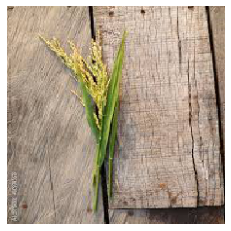

Your waste material is  Leaf smut


In [ ]:
waste_prediction('healthy rice plant11.jpg')

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
!pwd
!ls

/content
 drive			    'healthy rice plant3.jpg'   newmodel.h5
'healthy rice plant11.jpg'   img.jpg		        sample_data


In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp61s_74z2/assets


INFO:tensorflow:Assets written to: /tmp/tmp61s_74z2/assets


In [ ]:
sMy_TFlite_Model = tf.keras.models.load_model('newmodel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("My_TFlite_Model.tflite", "wb").write(tflite_model)
model.save("My_TFlite_Model.tflite")

INFO:tensorflow:Assets written to: /tmp/tmpobpp_v22/assets


FailedPreconditionError: ignored